In [1]:
import pandas as pd

df = pd.read_csv('data.csv', delimiter=',', header=0)
df.fillna(method='ffill', inplace=True)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2.694000e+03
mean,8256.410955,8299.507094,8198.370263,8249.135750,8249.135750,2.168960e+05
std,2585.447032,2593.173158,2568.466154,2581.601792,2581.601792,2.289419e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5803.624878,5845.687622,5750.112671,5797.612426,5797.612426,0.000000e+00
50%,8125.175049,8169.250000,8082.550049,8125.675049,8125.675049,1.655000e+05
75%,10475.212890,10526.099858,10409.112793,10459.737305,10459.737305,2.750500e+05
max,15371.450200,15431.750000,15243.400390,15314.700200,15314.700200,1.811000e+06


In [2]:
print(df.head())

         Date         Open         High          Low        Close  \
0  2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195   
1  2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902   
2  2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805   
3  2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098   
4  2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000   

     Adj Close  Volume  
0  5232.200195     0.0  
1  5277.899902     0.0  
2  5281.799805     0.0  
3  5263.100098     0.0  
4  5244.750000     0.0  


In [3]:
df = df[['Date', 'Close']]
df.info()
Close_array = df['Close'].to_numpy()
min_close = Close_array.min()
max_close = Close_array.max()
print(min_close, max_close)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2694 non-null   object 
 1   Close   2694 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.2+ KB
4544.200195 15314.7002


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2689   2021-04-26
2690   2021-04-27
2691   2021-04-28
2692   2021-04-29
2693   2021-04-30
Name: Date, Length: 2694, dtype: datetime64[ns]

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.describe()

,Close
count,2694.000000
mean,8249.135750
std,2581.601792
min,4544.200195
25%,5797.612426
50%,8125.675049
75%,10459.737305
max,15314.700200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2694 entries, 2010-01-04 to 2021-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2694 non-null   float64
dtypes: float64(1)
memory usage: 42.1 KB


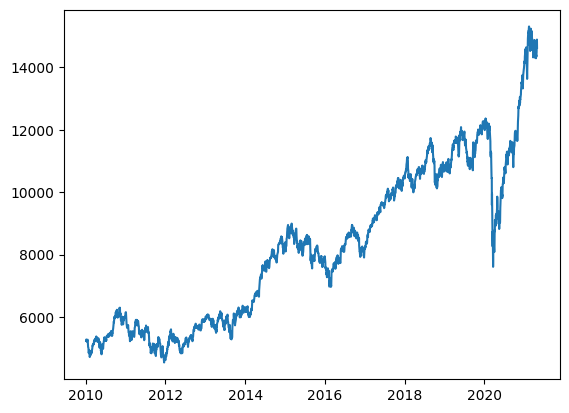

In [8]:
import matplotlib.pyplot as plt 
plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-2], values[-2:]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    #print(type(next_week.head(2).tail(1).index.values[0]))
    next_datetime_str = np.datetime_as_string(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  Y = np.array(Y)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target_A'] = Y[:, 0]
  ret_df['Target_B'] = Y[:, 1]

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2010-03-22', 
                                '2021-04-30',  
                                n=50)
windowed_df

,Target Date,Target-50,Target-49,Target-48,Target-47,Target-46,Target-45,Target-44,Target-43,Target-42,...,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target_A,Target_B
0,2010-03-22,5232.200195,5277.899902,5281.799805,5263.100098,5244.750000,5249.399902,5210.399902,5233.950195,5259.899902,...,5088.700195,5124.000000,5101.500000,5116.250000,5133.399902,5137.000000,5128.899902,5198.100098,5262.799805,5205.200195
1,2010-03-23,5277.899902,5281.799805,5263.100098,5244.750000,5249.399902,5210.399902,5233.950195,5259.899902,5252.200195,...,5124.000000,5101.500000,5116.250000,5133.399902,5137.000000,5128.899902,5198.100098,5262.799805,5205.200195,5225.299805
2,2010-03-25,5281.799805,5263.100098,5244.750000,5249.399902,5210.399902,5233.950195,5259.899902,5252.200195,5274.850098,...,5101.500000,5116.250000,5133.399902,5137.000000,5128.899902,5198.100098,5262.799805,5205.200195,5225.299805,5260.399902
3,2010-03-26,5263.100098,5244.750000,5249.399902,5210.399902,5233.950195,5259.899902,5252.200195,5274.850098,5225.649902,...,5116.250000,5133.399902,5137.000000,5128.899902,5198.100098,5262.799805,5205.200195,5225.299805,5260.399902,5282.000000
4,2010-03-29,5244.750000,5249.399902,5210.399902,5233.950195,5259.899902,5252.200195,5274.850098,5225.649902,5221.700195,...,5133.399902,5137.000000,5128.899902,5198.100098,5262.799805,5205.200195,5225.299805,5260.399902,5282.000000,5302.850098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,2021-04-26,14789.950200,14895.650390,14924.250000,15115.799810,15109.299810,15106.500000,15173.299810,15163.299810,15314.700200,...,14834.849610,14310.799810,14504.799810,14581.450200,14617.849610,14359.450200,14296.400390,14406.150390,14341.349610,14485.000000
2639,2021-04-27,14895.650390,14924.250000,15115.799810,15109.299810,15106.500000,15173.299810,15163.299810,15314.700200,15313.450200,...,14310.799810,14504.799810,14581.450200,14617.849610,14359.450200,14296.400390,14406.150390,14341.349610,14485.000000,14653.049810
2640,2021-04-28,14924.250000,15115.799810,15109.299810,15106.500000,15173.299810,15163.299810,15314.700200,15313.450200,15208.900390,...,14504.799810,14581.450200,14617.849610,14359.450200,14296.400390,14406.150390,14341.349610,14485.000000,14653.049810,14864.549810
2641,2021-04-29,15115.799810,15109.299810,15106.500000,15173.299810,15163.299810,15314.700200,15313.450200,15208.900390,15118.950200,...,14581.450200,14617.849610,14359.450200,14296.400390,14406.150390,14341.349610,14485.000000,14653.049810,14864.549810,14894.900390


In [10]:
windowed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Target Date  2643 non-null   datetime64[ns]
 1   Target-50    2643 non-null   float64       
 2   Target-49    2643 non-null   float64       
 3   Target-48    2643 non-null   float64       
 4   Target-47    2643 non-null   float64       
 5   Target-46    2643 non-null   float64       
 6   Target-45    2643 non-null   float64       
 7   Target-44    2643 non-null   float64       
 8   Target-43    2643 non-null   float64       
 9   Target-42    2643 non-null   float64       
 10  Target-41    2643 non-null   float64       
 11  Target-40    2643 non-null   float64       
 12  Target-39    2643 non-null   float64       
 13  Target-38    2643 non-null   float64       
 14  Target-37    2643 non-null   float64       
 15  Target-36    2643 non-null   float64       
 16  Target

In [11]:
#converting to numpy arrays so that we can feed it directy into a tensorflow model

def windowed_df_to_date_X_y(windowed_df):
    #we will get 3 thing
    #date: list of dates
    #input matrix X, 3 dimensional tensor
    #y is the output vector

    #converting the whole dataframe into a numpy array
    df_as_np = windowed_df.to_numpy()

    #getting the dates
    dates = df_as_np[:,0]

    #getting the input matrix
    middle_matrix = df_as_np[:,1:-2] #all rows from first col to second last col
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) #this reshaping is done in order to match the format required for lstm

    #getting the output vector
    y = df_as_np[:, -2:]

    #returning output
    return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

#dates, X, y are numpy arrays
dates.shape, X.shape, y.shape

((2643,), (2643, 50, 1), (2643, 2))

In [12]:
np.sum(np.isnan(y))


0

In [13]:
#Normalizing numpt arrays X and y

import numpy as np

# Normalize the matrix

X_normalized = (X - min_close)/(max_close - min_close)


y_normalized = (y - min_close)/(max_close - min_close)

dates.shape, X_normalized.shape, y_normalized.shape


((2643,), (2643, 50, 1), (2643, 2))

In [14]:
y

array([[ 5262.8 ,  5205.2 ],
       [ 5205.2 ,  5225.3 ],
       [ 5225.3 ,  5260.4 ],
       ...,
       [14653.05, 14864.55],
       [14864.55, 14894.9 ],
       [14894.9 , 14631.1 ]], dtype=float32)

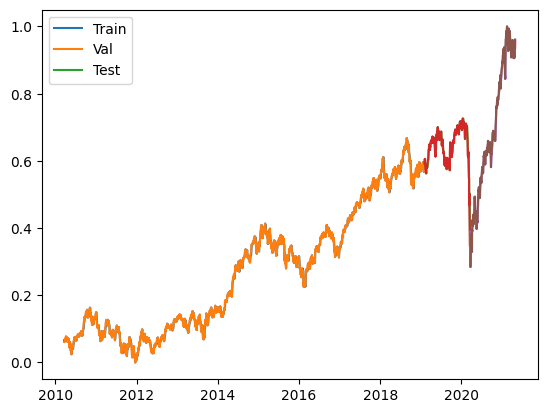

In [15]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_normalized_train, y_normalized_train = dates[:q_80], X_normalized[:q_80], y_normalized[:q_80]
dates_val, X_normalized_val, y_normalized_val = dates[q_80:q_90], X_normalized[q_80:q_90], y_normalized[q_80:q_90]
dates_test, X_normalized_test, y_normalized_test = dates[q_90:], X_normalized[q_90:], y_normalized[q_90:] 

plt.plot(dates_train, y_normalized_train)
plt.plot(dates_val, y_normalized_val)
plt.plot(dates_test, y_normalized_test)
plt.legend(['Train', 'Val', 'Test'])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((50,1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(2)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_normalized_train, y_normalized_train, validation_data=(X_normalized_val, y_normalized_val), epochs=50)

2023-07-09 15:52:19.158855: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 15:52:19.231228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 15:52:19.231901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 15:52:20.499489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-09 15:52:23.668006: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/50
67/67 [==============================] - 5s 40ms/step - loss: 0.0077 - mean_absolute_error: 0.0453 - val_loss: 0.0011 - val_mean_absolute_error: 0.0218
Epoch 2/50
67/67 [==============================] - 2s 33ms/step - loss: 2.0563e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0011 - val_mean_absolute_error: 0.0194
Epoch 3/50
67/67 [==============================] - 2s 33ms/step - loss: 1.9564e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0011 - val_mean_absolute_error: 0.0247
Epoch 4/50
67/67 [==============================] - 2s 33ms/step - loss: 2.0468e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0014 - val_mean_absolute_error: 0.0247
Epoch 5/50
67/67 [==============================] - 2s 35ms/step - loss: 1.9316e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0010 - val_mean_absolute_error: 0.0190
Epoch 6/50
67/67 [==============================] - 2s 33ms/step - loss: 1.7270e-04 - mean_absolute_error: 0.0103 - val_loss: 9.2679e-04 - val_mean_absolute_error: 0.023

In [18]:
model.save('stock_model')

INFO:tensorflow:Assets written to: stock_model/assets


INFO:tensorflow:Assets written to: stock_model/assets


67/67 [==============================] - 2s 19ms/step


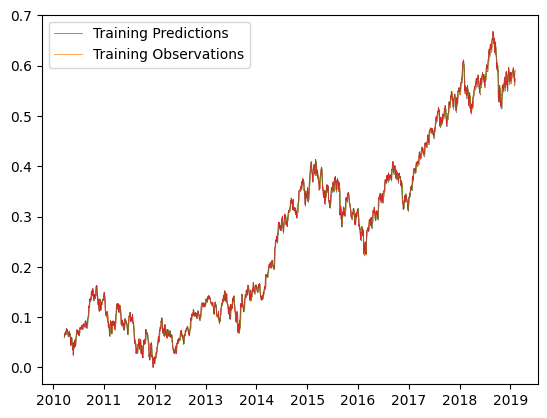

In [19]:
train_predictions = model.predict(X_normalized_train)

plt.plot(dates_train, train_predictions, linewidth=0.5)
plt.plot(dates_train, y_normalized_train, linewidth=0.5)
plt.legend(['Training Predictions', 'Training Observations'])

9/9 [==============================] - 0s 18ms/step


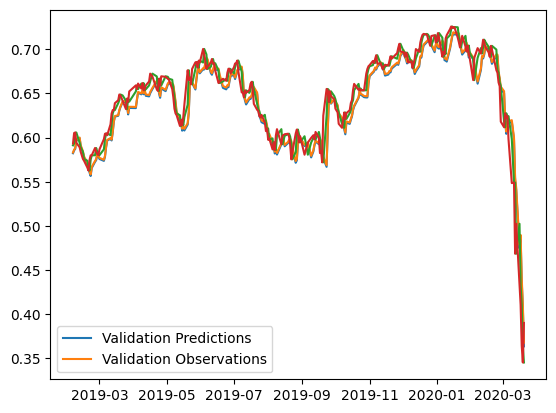

In [21]:
val_normalized_predictions = model.predict(X_normalized_val)

plt.plot(dates_val, val_normalized_predictions)
plt.plot(dates_val, y_normalized_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

9/9 [==============================] - 0s 18ms/step


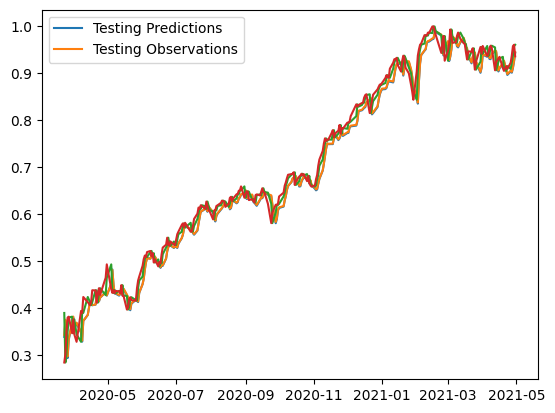

In [23]:
test_normalized_predictions = model.predict(X_normalized_test)

plt.plot(dates_test, test_normalized_predictions)
plt.plot(dates_test, y_normalized_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

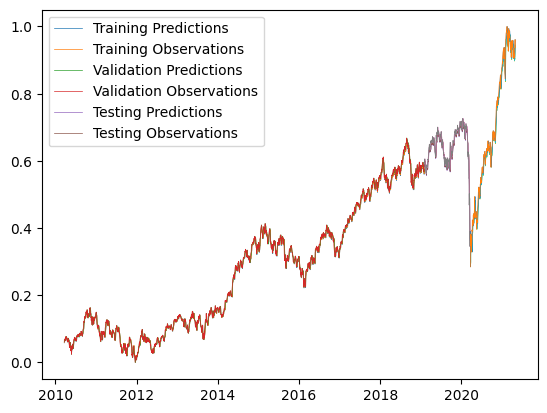

In [24]:
plt.plot(dates_train, train_predictions, linewidth=0.5)
plt.plot(dates_train, y_normalized_train, linewidth=0.5)
plt.plot(dates_val, val_normalized_predictions, linewidth=0.5)
plt.plot(dates_val, y_normalized_val, linewidth=0.5)
plt.plot(dates_test, test_normalized_predictions, linewidth=0.5)
plt.plot(dates_test, y_normalized_test, linewidth=0.5)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])